#### Y maze analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
y_data = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Y_data.csv')

In [3]:
y_data.columns

Index(['Subject Name', 'Subject Gender', 'Alternation Triplet',
       'Alternation Triplet (%)', 'Total Arm Entries', 'Total Distance',
       'Resting Time in Zone (Seconds) - Total', 'Mean Speed in Zone - Total',
       'Max Speed in Zone - Total', 'CCW Rotation Number Total',
       'CW Rotation Number Total'],
      dtype='object')

In [4]:
y_data['Subject Name'].unique().size

153

In [5]:
y_data[y_data.duplicated(subset = 'Subject Name', keep = False)]

,Subject Name,Subject Gender,Alternation Triplet,Alternation Triplet (%),Total Arm Entries,Total Distance,Resting Time in Zone (Seconds) - Total,Mean Speed in Zone - Total,Max Speed in Zone - Total,CCW Rotation Number Total,CW Rotation Number Total


In [6]:
meta = y_data['Subject Name'].str.split('_', expand = True)

In [12]:
meta.iloc[0]

0     KO5.7
1       Fem
2    MK-0.5
3         2
Name: 0, dtype: object

In [13]:
y_data['Tx'] = meta.loc[:, 2]

In [14]:
y_data['Genotype'] = meta.loc[:, 0].str[0:2]

In [15]:
y_data['Tx'].unique()

array(['MK-0.5', 'Pl', 'MK-1'], dtype=object)

In [17]:
y_data['Group'] = y_data['Genotype']+'_'+y_data['Tx']

In [18]:
y_data.groupby(['Genotype', 'Tx'])['Subject Name'].count()

Genotype  Tx    
KO        MK-0.5    45
          MK-1       2
          Pl        52
WT        MK-0.5    14
          MK-1      10
          Pl        30
Name: Subject Name, dtype: int64

In [22]:
y_data['Group'].unique()

array(['KO_MK-0.5', 'KO_Pl', 'KO_MK-1', 'WT_Pl', 'WT_MK-0.5', 'WT_MK-1'],
      dtype=object)

### Total Distance

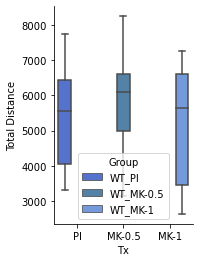

In [31]:
dist_wt = plt.figure(figsize=(2.5, 4))
sns.boxplot(data = y_data[y_data['Genotype']=='WT'], x = 'Tx', y = 'Total Distance', hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'WT_MK-1'], palette=['royalblue', 'steelblue', 'cornflowerblue'])
sns.despine()


In [32]:
pg.normality(data=y_data[y_data['Group']!='KO_MK-1'], dv = 'Total Distance', group = 'Group')

,W,pval,normal
KO_MK-0.5,0.861183,0.000072,False
KO_Pl,0.911546,0.000925,False
WT_Pl,0.934726,0.065640,True
WT_MK-0.5,0.972890,0.912745,True
WT_MK-1,0.877972,0.123669,True


In [33]:
pg.anova(data = y_data[y_data['Genotype']=='WT'], dv = 'Total Distance', between = 'Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,51,0.559851,0.574765,0.021483


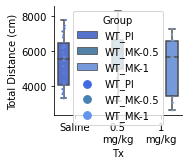

In [44]:
dist_wt_paper = plt.figure(figsize=(2.3, 2))
ax = plt.subplot()
sns.boxplot(data = y_data[y_data['Genotype']=='WT'], x = 'Tx', y = 'Total Distance', hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'WT_MK-1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], dodge=True)
sns.stripplot(data = y_data[y_data['Genotype']=='WT'], x = 'Tx', y = 'Total Distance', hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'WT_MK-1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth =0.2, dodge=True)
plt.ylabel('Total Distance (cm)')
labels = ['Saline', '0.5\nmg/kg', '1\nmg/kg']
ax.set_xticklabels(labels)
ax.set_xlabel=('')
sns.despine()


In [45]:
dist_wt_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Y_wt_dist_paper.svg')

In [46]:
dist_outliers = []
for group in y_data['Group'].unique():    
    out = pg.madmedianrule(y_data[y_data['Group']== group]['Total Distance'])
    idx = y_data[y_data['Group']== group]['Total Distance'].index.values
    
    for ii in idx[out]:
        dist_outliers.append(ii)
dist_outliers

[40, 82, 99, 101, 103, 111, 117, 124, 102, 115, 120, 123, 127, 128]

In [48]:
dist_tidy=y_data.drop(index = dist_outliers, inplace = False)

In [183]:
dist_tidy.groupby(['Genotype', 'Tx'])['Subject Name'].count()

Genotype  Tx    
KO        MK-0.5    37
          MK-1       2
          Pl        46
WT        MK-0.5    14
          MK-1      10
          Pl        30
Name: Subject Name, dtype: int64

In [49]:
pg.normality(data=dist_tidy[dist_tidy['Group']!='KO_MK-1'], dv = 'Total Distance', group = 'Group')

,W,pval,normal
KO_MK-0.5,0.946834,0.076311,True
KO_Pl,0.915521,0.002646,False
WT_Pl,0.934726,0.065640,True
WT_MK-0.5,0.972890,0.912745,True
WT_MK-1,0.877972,0.123669,True


In [88]:
dist_05 = dist_tidy[dist_tidy['Tx']!='MK-1']

In [89]:
dist_05.rename(columns={'Total Distance': 'Total_Distance'}, inplace=True)

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [90]:
pg.anova(data=dist_05, dv='Total_Distance', between= ['Genotype', 'Tx'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,7.445477e+07,1.0,7.445477e+07,53.877719,2.534543e-11,0.304604
1,Tx,8.928573e+06,1.0,8.928573e+06,6.460985,1.226901e-02,0.049907
2,Genotype * Tx,1.172892e+07,1.0,1.172892e+07,8.487403,4.248867e-03,0.064549
3,Residual,1.699763e+08,123.0,1.381921e+06,NaN,NaN,NaN


In [91]:
pg.pairwise_tukey(data=dist_05, dv='Total_Distance', between='Group')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,KO_MK-0.5,KO_Pl,3299.328378,4270.645217,-971.316839,259.597755,two-sided,-3.741623,0.001145,-0.818591
1,KO_MK-0.5,WT_MK-0.5,3299.328378,5781.462857,-2482.134479,368.860263,two-sided,-6.729200,0.001000,-2.078980
2,KO_MK-0.5,WT_Pl,3299.328378,5410.871000,-2111.542622,288.813557,two-sided,-7.311092,0.001000,-1.775409
3,KO_Pl,WT_MK-0.5,4270.645217,5781.462857,-1510.817640,358.818111,two-sided,-4.210539,0.001000,-1.268508
4,KO_Pl,WT_Pl,4270.645217,5410.871000,-1140.225783,275.872821,two-sided,-4.133157,0.001000,-0.960086
5,WT_MK-0.5,WT_Pl,5781.462857,5410.871000,370.591857,380.490096,two-sided,0.973986,0.741228,0.309586


In [86]:
dist_tidy[dist_tidy['Tx']!='MK-1']['Tx'].unique()

array(['MK-0.5', 'Pl'], dtype=object)

Text(0, 2, '***')

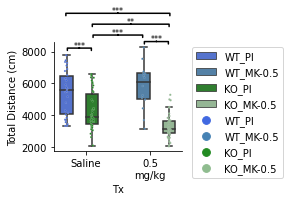

In [117]:
dist_all_paper = plt.figure(figsize=(2.3, 2))
ax = plt.subplot()
sns.boxplot(data= dist_05, x='Tx', y='Total_Distance', order = ['Pl', 'MK-0.5'], hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'KO_Pl', 'KO_MK-0.5'], palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], showfliers = False, dodge = True)
sns.stripplot(data= dist_05, x='Tx', y='Total_Distance',order = ['Pl', 'MK-0.5'], hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'KO_Pl', 'KO_MK-0.5'], palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], dodge = True, linewidth=0.2, size=2, edgecolor='silver')
plt.ylabel('Total Distance (cm)')
labels = ['Saline', '0.5\nmg/kg']
ax.set_xticklabels(labels)
sns.despine()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlabel=('')
plt.annotate(s='***', xy=(.2, 0.93), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=.3', lw=1.5, color='k'), fontsize = 8)
plt.annotate(s='***', xy=(.8, 0.99), xycoords='axes fraction', xytext=(0,2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=.3', lw=1.5, color='k'), fontsize = 8)
plt.annotate(s='***', xy=(.5, 1.05), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=3.1, lengthB=.3', lw=1.5, color='k'), fontsize = 8)
plt.annotate(s='**', xy=(.6, 1.15), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=4.8, lengthB=.3', lw=1.5, color='k'), fontsize = 8)
plt.annotate(s='***', xy=(.5, 1.25), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=6.5, lengthB=.3', lw=1.5, color='k'), fontsize = 8)


In [118]:
dist_all_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Y_all_dist_paper.svg')

### Alternation Triplets

In [119]:
tri_outliers = []
for group in y_data['Group'].unique():    
    out = pg.madmedianrule(y_data[y_data['Group']== group]['Alternation Triplet'])
    idx = y_data[y_data['Group']== group]['Alternation Triplet'].index.values
    
    for ii in idx[out]:
        tri_outliers.append(ii)
tri_outliers

[41, 142, 85, 92]

In [120]:
tri_tidy=y_data.drop(index = tri_outliers, inplace = False)

In [184]:
tri_tidy.groupby(['Genotype', 'Tx'])['Subject Name'].count()

Genotype  Tx    
KO        MK-0.5    45
          MK-1       2
          Pl        51
WT        MK-0.5    13
          MK-1       9
          Pl        29
Name: Subject Name, dtype: int64

In [122]:
pg.normality(data=tri_tidy[tri_tidy['Group']!='KO_MK-1'], dv = 'Alternation Triplet', group = 'Group')

,W,pval,normal
KO_MK-0.5,0.970107,0.292189,True
KO_Pl,0.979000,0.497325,True
WT_Pl,0.986789,0.967298,True
WT_MK-0.5,0.922055,0.267353,True
WT_MK-1,0.856091,0.086920,True


In [123]:
pg.anova(data=tri_tidy[tri_tidy['Genotype']!='KO'], dv = 'Alternation Triplet', between = 'Tx')

,Source,ddof1,ddof2,F,p-unc,np2
0,Tx,2,48,5.475629,0.00721,0.185768


In [124]:
pg.pairwise_tukey(data=tri_tidy[tri_tidy['Genotype']!='KO'], dv = 'Alternation Triplet', between = 'Tx')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,MK-0.5,MK-1,17.153846,17.111111,0.042735,1.854609,two-sided,0.023043,0.900000,0.009613
1,MK-0.5,Pl,17.153846,21.137931,-3.984085,1.427539,two-sided,-2.790877,0.015453,-0.913949
2,MK-1,Pl,17.111111,21.137931,-4.026820,1.631945,two-sided,-2.467498,0.037796,-0.921765


Text(0, 2, '*')

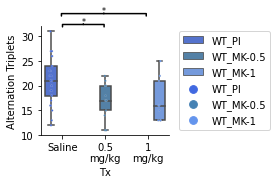

In [171]:
trip_wt_paper = plt.figure(figsize=(2.3, 2))
ax = plt.subplot()
sns.boxplot(data = tri_tidy[tri_tidy['Genotype']!='KO'], x = 'Tx', y = 'Alternation_Triplet', hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'WT_MK-1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], dodge=True)
sns.stripplot(data = tri_tidy[tri_tidy['Genotype']!='KO'], x = 'Tx', y = 'Alternation_Triplet', hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'WT_MK-1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth =0.2, dodge=True)
plt.ylabel('Alternation Triplets')
labels = ['Saline', '0.5\nmg/kg', '1\nmg/kg']
ax.set_xticklabels(labels)
ax.set_xlabel=('')
sns.despine()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.annotate(s='*', xy=(.33, 1), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.6, lengthB=.3', lw=1.5, color='k'), fontsize = 8)
plt.annotate(s='*', xy=(.49, 1.1), xycoords='axes fraction', xytext=(0,2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=5.3, lengthB=.3', lw=1.5, color='k'), fontsize = 8)


In [172]:
trip_wt_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Y_wt_trip_paper.svg')

In [141]:
tri_tidy.rename(columns={'Alternation Triplet':'Alternation_Triplet'}, inplace=True)

In [142]:
pg.anova(data=tri_tidy[tri_tidy['Tx']!='MK-1'], dv = 'Alternation_Triplet', between = ['Genotype', 'Tx'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,0.970798,1.0,0.970798,0.035533,0.850768,0.000265
1,Tx,326.439630,1.0,326.439630,11.948310,0.000733,0.081867
2,Genotype * Tx,8.573189,1.0,8.573189,0.313795,0.576296,0.002336
3,Residual,3661.012479,134.0,27.320989,NaN,NaN,NaN


In [144]:
pg.pairwise_tukey(data=tri_tidy[tri_tidy['Tx']!='MK-1'], dv = 'Alternation_Triplet', between = ['Group'])

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,KO_MK-0.5,KO_Pl,17.711111,20.549020,-2.837908,1.069036,two-sided,-2.654642,0.040776,-0.538594
1,KO_MK-0.5,WT_MK-0.5,17.711111,17.153846,0.557265,1.645827,two-sided,0.338593,0.900000,0.105180
2,KO_MK-0.5,WT_Pl,17.711111,21.137931,-3.426820,1.244683,two-sided,-2.753166,0.031033,-0.648753
3,KO_Pl,WT_MK-0.5,20.549020,17.153846,3.395173,1.623983,two-sided,2.090646,0.157720,0.641662
4,KO_Pl,WT_Pl,20.549020,21.137931,-0.588911,1.215652,two-sided,-0.484441,0.900000,-0.111581
5,WT_MK-0.5,WT_Pl,17.153846,21.137931,-3.984085,1.744625,two-sided,-2.283634,0.103340,-0.747839


Text(0, 2, '*')

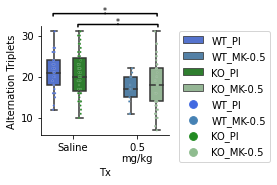

In [151]:
trip_all_paper = plt.figure(figsize=(2.3, 2))
ax = plt.subplot()
sns.boxplot(data= tri_tidy[tri_tidy['Tx']!='MK-1'], x='Tx', y='Alternation_Triplet', order = ['Pl', 'MK-0.5'], hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'KO_Pl', 'KO_MK-0.5'], palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], showfliers = False, dodge = True)
sns.stripplot(data= tri_tidy[tri_tidy['Tx']!='MK-1'], x='Tx', y='Alternation_Triplet',order = ['Pl', 'MK-0.5'], hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'KO_Pl', 'KO_MK-0.5'], palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], dodge = True, linewidth=0.2, size=2, edgecolor='silver')
plt.ylabel('Alternation Triplets')
labels = ['Saline', '0.5\nmg/kg']
ax.set_xticklabels(labels)
sns.despine()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlabel=('')
plt.annotate(s='*', xy=(.6, 1), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=.3', lw=1.5, color='k'), fontsize = 8)
plt.annotate(s='*', xy=(.5, 1.1), xycoords='axes fraction', xytext=(0,2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=6.5, lengthB=.3', lw=1.5, color='k'), fontsize = 8)


In [152]:
trip_all_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Y_all_trip_paper.svg')

### Alternation Percentage (%)

In [153]:
triper_outliers = []
for group in y_data['Group'].unique():    
    out = pg.madmedianrule(y_data[y_data['Group']== group]['Alternation Triplet (%)'])
    idx = y_data[y_data['Group']== group]['Alternation Triplet (%)'].index.values
    
    for ii in idx[out]:
        triper_outliers.append(ii)
triper_outliers

[22, 39, 106, 109, 120, 128, 96, 133]

In [154]:
triper_tidy=y_data.drop(index = triper_outliers, inplace = False)

In [185]:
triper_tidy.groupby(['Genotype', 'Tx'])['Subject Name'].count()

Genotype  Tx    
KO        MK-0.5    42
          MK-1       2
          Pl        49
WT        MK-0.5    14
          MK-1       8
          Pl        30
Name: Subject Name, dtype: int64

In [156]:
pg.normality(data = triper_tidy[triper_tidy['Group']!= 'KO_MK-1'], dv = 'Alternation Triplet (%)', group = 'Group')

,W,pval,normal
KO_MK-0.5,0.983410,0.791348,True
KO_Pl,0.970348,0.249999,True
WT_Pl,0.986095,0.954324,True
WT_MK-0.5,0.973889,0.923893,True
WT_MK-1,0.986103,0.986637,True


In [158]:
pg.anova(data=triper_tidy[triper_tidy['Genotype']!='KO'], dv = 'Alternation Triplet (%)', between = 'Tx')

,Source,ddof1,ddof2,F,p-unc,np2
0,Tx,2,49,1.070163,0.350831,0.041852


In [159]:
pg.pairwise_tukey(data=triper_tidy[triper_tidy['Genotype']!='KO'], dv = 'Alternation Triplet (%)', between = 'Tx')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,MK-0.5,MK-1,52.137143,55.703750,-3.566607,4.324759,two-sided,-0.824695,0.672019,-0.351627
1,MK-0.5,Pl,52.137143,50.124333,2.012810,3.158357,two-sided,0.637296,0.779506,0.202568
2,MK-1,Pl,55.703750,50.124333,5.579417,3.882807,two-sided,1.436955,0.323410,0.559785


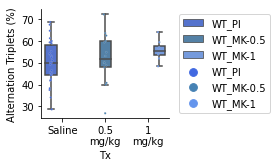

In [170]:
tripper_wt_paper = plt.figure(figsize=(2.3, 2))
ax = plt.subplot()
sns.boxplot(data = triper_tidy[triper_tidy['Genotype']!='KO'], x = 'Tx', y = 'Alternation_Triplet_Per', hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'WT_MK-1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], dodge=True, showfliers = False)
sns.stripplot(data = triper_tidy[triper_tidy['Genotype']!='KO'], x = 'Tx', y = 'Alternation_Triplet_Per', hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'WT_MK-1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth =0.2, dodge=True)
plt.ylabel('Alternation Triplets (%)')
labels = ['Saline', '0.5\nmg/kg', '1\nmg/kg']
ax.set_xticklabels(labels)
ax.set_xlabel=('')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
sns.despine()


In [174]:
tripper_wt_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Y_wt_triper_paper.svg')

In [161]:
triper_tidy.rename(columns={'Alternation Triplet (%)':'Alternation_Triplet_Per'}, inplace=True)

In [162]:
pg.anova(data=triper_tidy[triper_tidy['Tx']!='MK-1'], dv = 'Alternation_Triplet_Per', between = ['Genotype', 'Tx'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,0.910382,1.0,0.910382,0.009020,0.924481,0.000069
1,Tx,36.507871,1.0,36.507871,0.361715,0.548595,0.002754
2,Genotype * Tx,12.183093,1.0,12.183093,0.120709,0.728825,0.000921
3,Residual,13221.811294,131.0,100.929857,NaN,NaN,NaN


In [164]:
pg.pairwise_tukey(data=triper_tidy[triper_tidy['Tx']!='MK-1'], dv = 'Alternation_Triplet_Per', between = 'Group')


,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,KO_MK-0.5,KO_Pl,51.099048,50.433469,0.665578,2.112554,two-sided,0.315059,0.9,0.065691
1,KO_MK-0.5,WT_MK-0.5,51.099048,52.137143,-1.038095,3.100382,two-sided,-0.334828,0.9,-0.101888
2,KO_MK-0.5,WT_Pl,51.099048,50.124333,0.974714,2.401545,two-sided,0.405870,0.9,0.095978
3,KO_Pl,WT_MK-0.5,50.433469,52.137143,-1.703673,3.044514,two-sided,-0.559588,0.9,-0.167487
4,KO_Pl,WT_Pl,50.433469,50.124333,0.309136,2.328974,two-sided,0.132735,0.9,0.030470
5,WT_MK-0.5,WT_Pl,52.137143,50.124333,2.012810,3.251708,two-sided,0.619001,0.9,0.196752


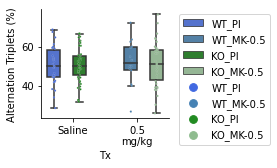

In [178]:
triper_all_paper = plt.figure(figsize=(2.3, 2))
ax = plt.subplot()
sns.boxplot(data= triper_tidy[triper_tidy['Tx']!='MK-1'], x='Tx', y='Alternation_Triplet_Per', order = ['Pl', 'MK-0.5'], hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'KO_Pl', 'KO_MK-0.5'], palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], showfliers = False, dodge = True)
sns.stripplot(data= triper_tidy[triper_tidy['Tx']!='MK-1'], x='Tx', y='Alternation_Triplet_Per',order = ['Pl', 'MK-0.5'], hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'KO_Pl', 'KO_MK-0.5'], palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], dodge = True, linewidth=0.2, size=2, edgecolor='silver')
plt.ylabel('Alternation Triplets (%)')
labels = ['Saline', '0.5\nmg/kg']
ax.set_xticklabels(labels)
sns.despine()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlabel=('')
#plt.annotate(s='*', xy=(.6, 1), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=.3', lw=1.5, color='k'), fontsize = 8)
#plt.annotate(s='*', xy=(.5, 1.1), xycoords='axes fraction', xytext=(0,2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=6.5, lengthB=.3', lw=1.5, color='k'), fontsize = 8)


In [179]:
triper_all_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Y_all_triper_paper.svg')

### Arm Entries

In [180]:
entries_outliers = []
for group in y_data['Group'].unique():    
    out = pg.madmedianrule(y_data[y_data['Group']== group]['Total Arm Entries'])
    idx = y_data[y_data['Group']== group]['Total Arm Entries'].index.values
    
    for ii in idx[out]:
        entries_outliers.append(ii)
entries_outliers

[22, 39, 26, 30, 41, 128, 84, 129, 146, 147]

In [186]:
entries_tidy=y_data.drop(index = entries_outliers, inplace = False)

In [187]:
entries_tidy.groupby(['Genotype', 'Tx'])['Subject Name'].count()

Genotype  Tx    
KO        MK-0.5    43
          MK-1       2
          Pl        48
WT        MK-0.5    10
          MK-1      10
          Pl        30
Name: Subject Name, dtype: int64

In [189]:
pg.normality(data = entries_tidy[entries_tidy['Group']!='KO_MK-1'], dv = 'Total Arm Entries', group = 'Group')

,W,pval,normal
KO_MK-0.5,0.980206,0.655611,True
KO_Pl,0.971977,0.301872,True
WT_Pl,0.961398,0.336179,True
WT_MK-0.5,0.976930,0.946651,True
WT_MK-1,0.936803,0.518016,True


In [190]:
pg.anova(data=entries_tidy[entries_tidy['Genotype']!='KO'], dv = 'Total Arm Entries', between = 'Tx')

,Source,ddof1,ddof2,F,p-unc,np2
0,Tx,2,47,6.886261,0.002383,0.226624


In [191]:
pg.pairwise_tukey(data=entries_tidy[entries_tidy['Genotype']!='KO'], dv = 'Total Arm Entries', between = 'Tx')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,MK-0.5,MK-1,36.1,37.0,-0.9,3.868971,two-sided,-0.23262,0.900000,-0.099635
1,MK-0.5,Pl,36.1,45.8,-9.7,3.159002,two-sided,-3.07059,0.006577,-1.098945
2,MK-1,Pl,37.0,45.8,-8.8,3.159002,two-sided,-2.78569,0.015709,-0.996981


Text(0, 2, '*')

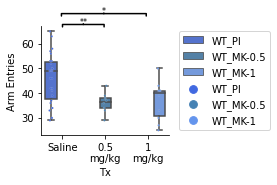

In [193]:
entries_wt_paper = plt.figure(figsize=(2.3, 2))
ax = plt.subplot()
sns.boxplot(data = entries_tidy[entries_tidy['Genotype']!='KO'], x = 'Tx', y = 'Total Arm Entries', hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'WT_MK-1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], dodge=True, showfliers = False)
sns.stripplot(data = entries_tidy[entries_tidy['Genotype']!='KO'], x = 'Tx', y = 'Total Arm Entries', hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'WT_MK-1'], palette=['royalblue', 'steelblue', 'cornflowerblue'], edgecolor='silver', size=2, linewidth =0.2, dodge=True)
plt.ylabel('Arm Entries')
labels = ['Saline', '0.5\nmg/kg', '1\nmg/kg']
ax.set_xticklabels(labels)
ax.set_xlabel=('')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
sns.despine()
plt.annotate(s='**', xy=(.33, 1), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2.6, lengthB=.3', lw=1.5, color='k'), fontsize = 8)
plt.annotate(s='*', xy=(.49, 1.1), xycoords='axes fraction', xytext=(0,2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=5.3, lengthB=.3', lw=1.5, color='k'), fontsize = 8)


In [195]:
entries_wt_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Y_wt_entries_paper.svg')

In [196]:
entries_tidy.rename(columns={'Total Arm Entries':'Arm_Entries'}, inplace=True)

In [198]:
pg.anova(data=entries_tidy, dv = 'Arm_Entries', between = ['Genotype', 'Tx'])

,Source,SS,DF,MS,F,p-unc,np2
0,Genotype,51.536941,1.0,51.536941,0.505740,0.478198,0.003678
1,Tx,1438.620727,2.0,719.310364,7.058709,0.001209,0.093420
2,Genotype * Tx,443.510434,2.0,221.755217,2.176120,0.117388,0.030790
3,Residual,13960.841957,137.0,101.903956,NaN,NaN,NaN


In [199]:
pg.pairwise_tukey(data=entries_tidy[entries_tidy['Tx']!='MK-1'], dv = 'Arm_Entries', between = 'Group')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,KO_MK-0.5,KO_Pl,36.860465,42.270833,-5.410368,2.094307,two-sided,-2.583369,0.049396,-0.537857
1,KO_MK-0.5,WT_MK-0.5,36.860465,36.100000,0.760465,3.501694,two-sided,0.217171,0.900000,0.075117
2,KO_MK-0.5,WT_Pl,36.860465,45.800000,-8.939535,2.372690,two-sided,-3.767679,0.001033,-0.886772
3,KO_Pl,WT_MK-0.5,42.270833,36.100000,6.170833,3.467112,two-sided,1.779820,0.284363,0.610362
4,KO_Pl,WT_Pl,42.270833,45.800000,-3.529167,2.321349,two-sided,-1.520308,0.426966,-0.350329
5,WT_MK-0.5,WT_Pl,36.100000,45.800000,-9.700000,3.642033,two-sided,-2.663348,0.039880,-0.953196


Text(0, 2, '*')

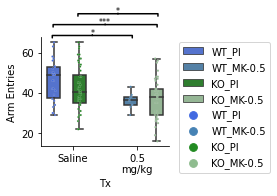

In [204]:
entries_all_paper = plt.figure(figsize=(2.3, 2))
ax = plt.subplot()
sns.boxplot(data= entries_tidy[entries_tidy['Tx']!='MK-1'], x='Tx', y='Arm_Entries', order = ['Pl', 'MK-0.5'], hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'KO_Pl', 'KO_MK-0.5'], palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], showfliers = False, dodge = True)
sns.stripplot(data= entries_tidy[entries_tidy['Tx']!='MK-1'], x='Tx', y='Arm_Entries',order = ['Pl', 'MK-0.5'], hue='Group', hue_order = ['WT_Pl', 'WT_MK-0.5', 'KO_Pl', 'KO_MK-0.5'], palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], dodge = True, linewidth=0.2, size=2, edgecolor='silver')
plt.ylabel('Arm Entries')
labels = ['Saline', '0.5\nmg/kg']
ax.set_xticklabels(labels)
sns.despine()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax.set_xlabel=('')
plt.annotate(s='*', xy=(.4, 1), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=.3', lw=1.5, color='k'), fontsize = 8)
plt.annotate(s='***', xy=(.5, 1.1), xycoords='axes fraction', xytext=(0,2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=6.5, lengthB=.3', lw=1.5, color='k'), fontsize = 8)
plt.annotate(s='*', xy=(.6, 1.2), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=5, lengthB=.3', lw=1.5, color='k'), fontsize = 8)


In [205]:
entries_all_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Y_all_entries_paper.svg')